In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn as sk
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('synthetic_vehicle_reliability_data.csv')
df=df.drop(['Service_Date'] , axis = 1)
df

,Vehicle_Brand,Vehicle_Model,Year_of_Manufacture,Mileage,Type_of_Service,scheduled,reliability
0,BMW,3 Series,2015,4813,Cooling System Repairs,1,1
1,BMW,X3,2015,4669,Engine Diagnostics/Repair/Replacement,0,1
2,Nissan,Sentra,2012,6288,Cooling System Repairs,0,0
3,Toyota,Corolla,2011,6698,Brake System Repairs,0,0
4,Volkswagen,Tiguan,2013,5728,Transmission Diagnostics/Repair/Replacement,1,1
...,...,...,...,...,...,...,...
995,Toyota,Camry,2013,5516,Routine Maintenance Services,1,0
996,Mercedes-Benz,E-Class,2010,7401,Engine Diagnostics/Repair/Replacement,0,1
997,Chevrolet,Traverse,2014,5250,Electrical System Repairs,0,0
998,BMW,5 Series,2013,5849,Wear-and-Tear Replacements,0,1


In [3]:
df_encod = pd.get_dummies(df , columns=['Vehicle_Brand', 'Vehicle_Model' , 'Type_of_Service'] , dtype=int)
df_encod.head()

,Year_of_Manufacture,Mileage,scheduled,reliability,Vehicle_Brand_Audi,Vehicle_Brand_BMW,Vehicle_Brand_Chevrolet,Vehicle_Brand_Ford,Vehicle_Brand_Honda,Vehicle_Brand_Hyundai,...,Vehicle_Model_X5,Type_of_Service_Brake System Repairs,Type_of_Service_Cooling System Repairs,Type_of_Service_Electrical System Repairs,Type_of_Service_Engine Diagnostics/Repair/Replacement,Type_of_Service_Multiple Unscheduled Repairs,Type_of_Service_Routine Maintenance Services,Type_of_Service_Suspension System Repairs,Type_of_Service_Transmission Diagnostics/Repair/Replacement,Type_of_Service_Wear-and-Tear Replacements
0,2015,4813,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2015,4669,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2012,6288,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,6698,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,2013,5728,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
print(df_encod.shape)
df.shape

(1000, 63)


(1000, 7)

In [5]:
df.describe()

,Year_of_Manufacture,Mileage,scheduled,reliability
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,2015.01300,4745.794000,0.477000,0.502000
std,3.18103,1600.849634,0.499721,0.500246
min,2010.00000,2002.000000,0.000000,0.000000
25%,2012.00000,3313.500000,0.000000,0.000000
50%,2015.00000,4796.000000,0.000000,1.000000
75%,2018.00000,6103.750000,1.000000,1.000000
max,2020.00000,7499.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Vehicle_Brand        1000 non-null   object
 1   Vehicle_Model        1000 non-null   object
 2   Year_of_Manufacture  1000 non-null   int64 
 3   Mileage              1000 non-null   int64 
 4   Type_of_Service      1000 non-null   object
 5   scheduled            1000 non-null   int64 
 6   reliability          1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [7]:
print(df['Type_of_Service'].value_counts())
print(df['Vehicle_Brand'].value_counts())
print(df['scheduled'].value_counts())
print(df['reliability'].value_counts())

Engine Diagnostics/Repair/Replacement          129
Wear-and-Tear Replacements                     122
Electrical System Repairs                      122
Suspension System Repairs                      114
Transmission Diagnostics/Repair/Replacement    104
Multiple Unscheduled Repairs                   104
Cooling System Repairs                         103
Brake System Repairs                           101
Routine Maintenance Services                   101
Name: Type_of_Service, dtype: int64
Nissan           113
Mercedes-Benz    111
Ford             104
Toyota           103
Honda            102
BMW              100
Volkswagen        97
Chevrolet         94
Audi              93
Hyundai           83
Name: Vehicle_Brand, dtype: int64
0    523
1    477
Name: scheduled, dtype: int64
1    502
0    498
Name: reliability, dtype: int64


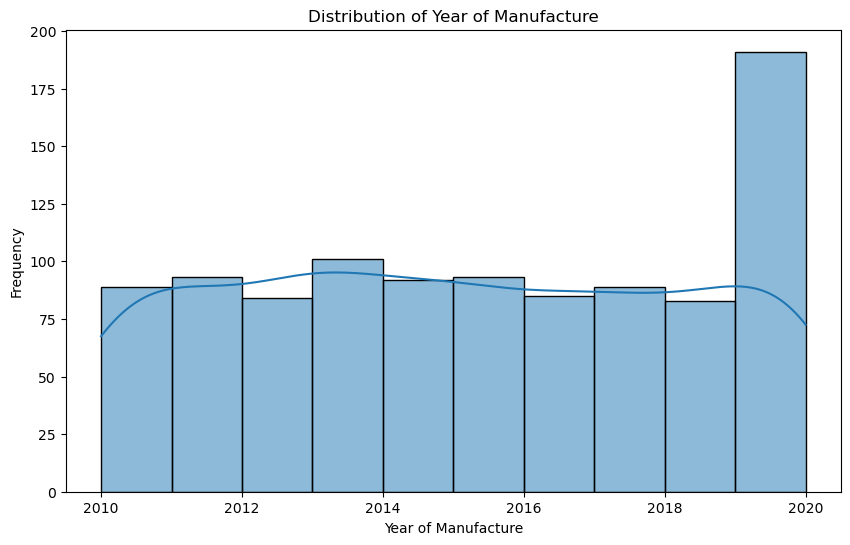

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Year_of_Manufacture']  ,bins=10, kde = True)
plt.title('Distribution of Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Frequency')
plt.show()

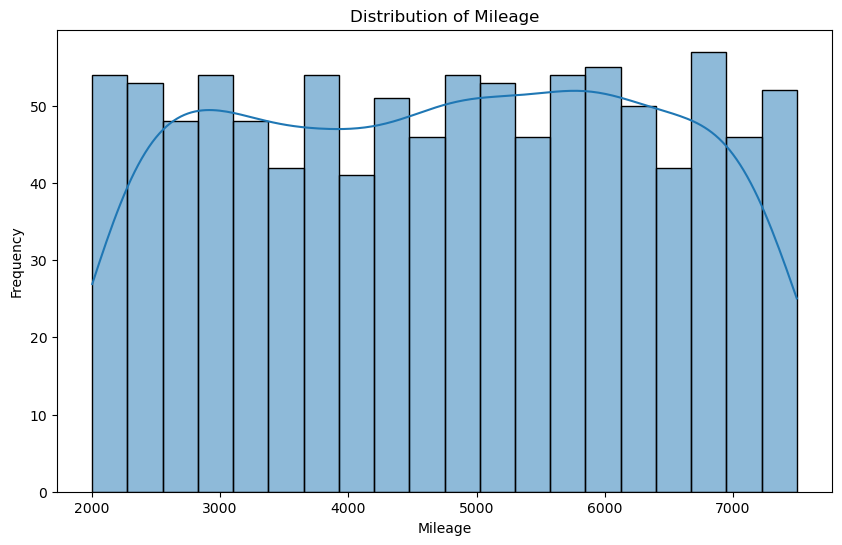

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'], bins=20, kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

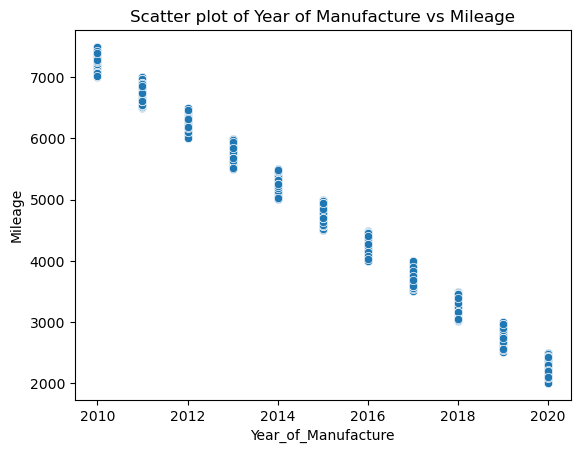

In [10]:
sns.scatterplot(x='Year_of_Manufacture', y='Mileage', data=df)
plt.title('Scatter plot of Year of Manufacture vs Mileage')
plt.show()


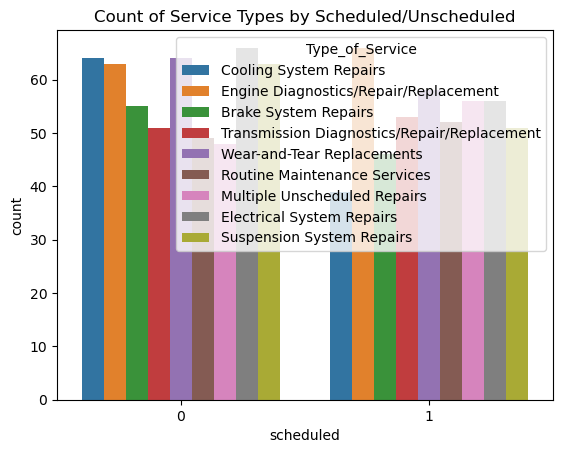

In [11]:
sns.countplot(x='scheduled', hue='Type_of_Service', data=df)
plt.title('Count of Service Types by Scheduled/Unscheduled')
plt.show()

In [12]:
df.corr(numeric_only=True)

,Year_of_Manufacture,Mileage,scheduled,reliability
Year_of_Manufacture,1.000000,-0.996023,-0.035390,-0.045622
Mileage,-0.996023,1.000000,0.035890,0.042731
scheduled,-0.035390,0.035890,1.000000,0.030216
reliability,-0.045622,0.042731,0.030216,1.000000


In [13]:
df_encod.corr(method='kendall',numeric_only=True )

,Year_of_Manufacture,Mileage,scheduled,reliability,Vehicle_Brand_Audi,Vehicle_Brand_BMW,Vehicle_Brand_Chevrolet,Vehicle_Brand_Ford,Vehicle_Brand_Honda,Vehicle_Brand_Hyundai,...,Vehicle_Model_X5,Type_of_Service_Brake System Repairs,Type_of_Service_Cooling System Repairs,Type_of_Service_Electrical System Repairs,Type_of_Service_Engine Diagnostics/Repair/Replacement,Type_of_Service_Multiple Unscheduled Repairs,Type_of_Service_Routine Maintenance Services,Type_of_Service_Suspension System Repairs,Type_of_Service_Transmission Diagnostics/Repair/Replacement,Type_of_Service_Wear-and-Tear Replacements
Year_of_Manufacture,1.000000,-0.953850,-0.030141,-0.038895,0.038994,-0.018984,-0.007788,-0.016519,0.016970,-0.027253,...,-0.006910,0.052009,-0.064849,0.001328,-0.024647,0.036148,0.001162,0.018387,-0.018220,0.000612
Mileage,-0.953850,1.000000,0.029617,0.034511,-0.039261,0.019575,0.009543,0.019520,-0.016711,0.028093,...,0.005544,-0.050093,0.062089,-0.004674,0.023033,-0.034294,0.001141,-0.013968,0.018909,-0.003597
scheduled,-0.030141,0.029617,1.000000,0.030216,-0.023169,0.042045,0.028554,-0.023664,-0.030788,-0.011546,...,0.038552,-0.014465,-0.066731,-0.013421,0.026681,0.041923,0.025401,-0.021280,0.022247,-0.001187
reliability,-0.038895,0.034511,0.030216,1.000000,-0.025383,-0.001333,-0.062969,0.037948,0.018477,-0.041076,...,0.017843,0.015253,0.001934,-0.050378,0.055144,-0.001363,0.028527,-0.045486,0.031396,-0.032046
Vehicle_Brand_Audi,0.038994,-0.039261,-0.023169,-0.025383,1.000000,-0.106737,-0.103143,-0.109094,-0.107919,-0.096337,...,-0.053341,0.006936,0.061407,-0.003640,-0.051329,-0.007580,0.052642,-0.017356,-0.018859,-0.014160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Type_of_Service_Multiple Unscheduled Repairs,0.036148,-0.034294,0.041923,-0.001363,-0.007580,-0.015287,-0.019936,0.001975,0.025891,-0.031253,...,-0.016331,-0.114194,-0.115448,-0.126998,-0.131114,1.000000,-0.114194,-0.122208,-0.116071,-0.126998
Type_of_Service_Routine Maintenance Services,0.001162,0.001141,0.025401,0.028527,0.052642,0.009956,-0.016990,-0.016351,-0.069103,-0.004607,...,-0.055835,-0.112347,-0.113580,-0.124943,-0.128993,-0.114194,1.000000,-0.120231,-0.114194,-0.124943
Type_of_Service_Suspension System Repairs,0.018387,-0.013968,-0.021280,-0.045486,-0.017356,0.037758,-0.007720,0.032407,0.045454,-0.016675,...,0.037312,-0.120231,-0.121551,-0.133711,-0.138045,-0.122208,-0.120231,1.000000,-0.122208,-0.133711
Type_of_Service_Transmission Diagnostics/Repair/Replacement,-0.018220,0.018909,0.022247,0.031396,-0.018859,-0.026207,-0.008711,0.012706,0.004243,0.028118,...,0.003881,-0.114194,-0.115448,-0.126998,-0.131114,-0.116071,-0.114194,-0.122208,1.000000,-0.126998


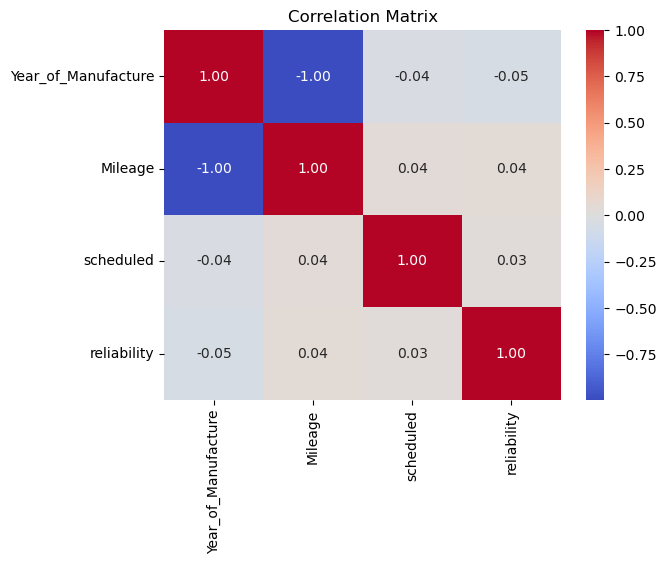

In [14]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

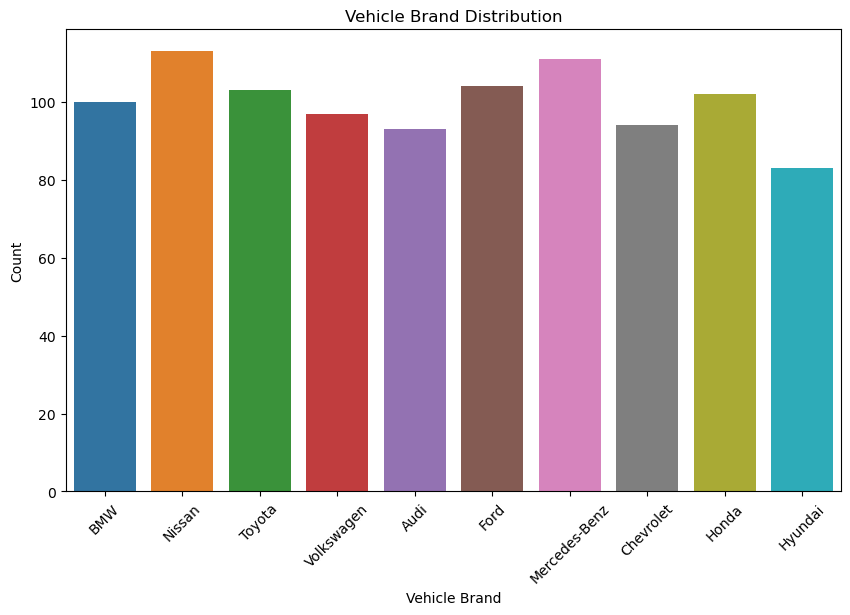

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Vehicle_Brand')
plt.title('Vehicle Brand Distribution')
plt.xlabel('Vehicle Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

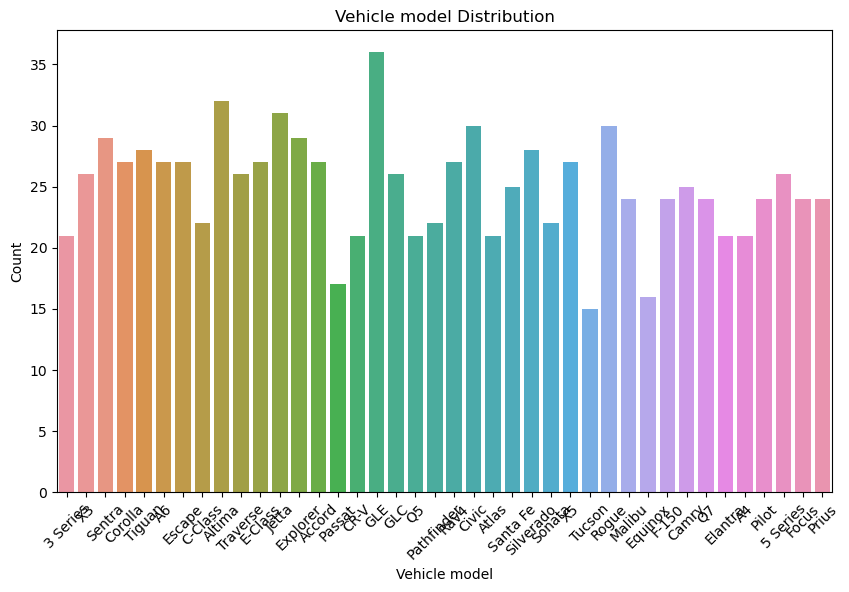

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Vehicle_Model')
plt.title('Vehicle model Distribution')
plt.xlabel('Vehicle model')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
X = df_encod.drop(['reliability'], axis=1)

y = df_encod['reliability']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
log_reg = sm.Logit(y_train , X_train).fit()
log = sm.GLM(y_train,X_train , family=sm.families.Binomial()).fit()

Optimization terminated successfully.
         Current function value: 0.657596
         Iterations 13


In [20]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            reliability   No. Observations:                  800
Model:                          Logit   Df Residuals:                      749
Method:                           MLE   Df Model:                           50
Date:                Thu, 22 Feb 2024   Pseudo R-squ.:                 0.05125
Time:                        07:31:55   Log-Likelihood:                -526.08
converged:                       True   LL-Null:                       -554.50
Covariance Type:            nonrobust   LLR p-value:                    0.2355
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Year_of_Manufacture                                            -0.3794      0.269     -1.413      0.158      -0.906       0.147
Mileage                                                        -0.0007      0.001     -1.268      0.205      -0.002       0.000
scheduled                                                       0.0765      0.150      0.509      0.611      -0.218       0.371
Vehicle_Brand_Audi                                            324.8917   9.95e+06   3.27e-05      1.000   -1.95e+07    1.95e+07
Vehicle_Brand_BMW                                             325.0521   3.28e+07    9.9e-06      1.000   -6.43e+07    6.43e+07
Vehicle_Brand_Chevrolet                                       324.8239        nan        nan        nan         nan         nan
Vehicle_Brand_Ford                                            325.3702        nan        nan        nan         nan         nan
Vehicle_Brand_Honda                                           325.1942   3.23e+07   1.01e-05      1.000   -6.32e+07    6.32e+07
Vehicle_Brand_Hyundai                                         324.9486   1.79e+07   1.81e-05      1.000   -3.51e+07    3.51e+07
Vehicle_Brand_Mercedes-Benz                                   325.2924        nan        nan        nan         nan         nan
Vehicle_Brand_Nissan                                          325.1426   2.03e+07    1.6e-05      1.000   -3.99e+07    3.99e+07
Vehicle_Brand_Toyota                                          325.1456        nan        nan        nan         nan         nan
Vehicle_Brand_Volkswagen                                      325.1056   2.69e+07   1.21e-05      1.000   -5.27e+07    5.27e+07
Vehicle_Model_3 Series                                         81.5641   3.34e+07   2.44e-06      1.000   -6.55e+07    6.55e+07
Vehicle_Model_5 Series                                         81.2177   3.32e+07   2.45e-06      1.000    -6.5e+07     6.5e+07
Vehicle_Model_A4                                               80.9022    8.7e+06    9.3e-06      1.000    -1.7e+07     1.7e+07
Vehicle_Model_A6                                               81.4702   8.82e+06   9.23e-06      1.000   -1.73e+07    1.73e+07
Vehicle_Model_Accord                                           80.8867   3.12e+07   2.59e-06      1.000   -6.11e+07    6.11e+07
Vehicle_Model_Altima                                           80.9675   2.13e+07   3.81e-06      1.000   -4.17e+07    4.17e+07
Vehicle_Model_Atlas                                            79.3438   2.64e+07   3.01e-06      1.000   -5.17e+07    5.17e+07
Vehicle_Model_C-Class                                          81.8267        nan        nan        nan         nan         nan
Vehicle_Model_CR-V                                             81.2961   3.14e+07   2.59e-06      1.000   -6.15e+07    6.15e+07
Vehicle_Model_Camry                      

In [21]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            reliability   No. Observations:                  800
Model:                            GLM   Df Residuals:                      749
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -526.08
Date:                Thu, 22 Feb 2024   Deviance:                       1052.2
Time:                        07:31:55   Pearson chi2:                     801.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06858
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Year_of_Manufacture                                            -0.3794      0.269     -1.413      0.158      -0.906       0.147
Mileage                                                        -0.0007      0.001     -1.268      0.205      -0.002       0.000
scheduled                                                       0.0765      0.150      0.509      0.611      -0.218       0.371
Vehicle_Brand_Audi                                            324.8917    230.266      1.411      0.158    -126.421     776.204
Vehicle_Brand_BMW                                             325.0521    230.275      1.412      0.158    -126.278     776.382
Vehicle_Brand_Chevrolet                                       324.8239    230.269      1.411      0.158    -126.496     776.144
Vehicle_Brand_Ford                                            325.3702    230.278      1.413      0.158    -125.967     776.707
Vehicle_Brand_Honda                                           325.1942    230.270      1.412      0.158    -126.127     776.515
Vehicle_Brand_Hyundai                                         324.9486    230.278      1.411      0.158    -126.388     776.285
Vehicle_Brand_Mercedes-Benz                                   325.2924    230.272      1.413      0.158    -126.032     776.617
Vehicle_Brand_Nissan                                          325.1426    230.271      1.412      0.158    -126.180     776.465
Vehicle_Brand_Toyota                                          325.1456    230.262      1.412      0.158    -126.159     776.450
Vehicle_Brand_Volkswagen                                      325.1056    230.266      1.412      0.158    -126.208     776.419
Vehicle_Model_3 Series                                         81.5641     57.568      1.417      0.157     -31.268     194.396
Vehicle_Model_5 Series                                         81.2177     57.559      1.411      0.158     -31.597     194.032
Vehicle_Model_A4                                               80.9022     57.567      1.405      0.160     -31.927     193.732
Vehicle_Model_A6                                               81.4702     57.549      1.416      0.157     -31.324     194.264
Vehicle_Model_Accord                                           80.8867     57.559      1.405      0.160     -31.926     193.700
Vehicle_Model_Altima                                           80.9675     57.573      1.406      0.160     -31.873     193.808
Vehicle_Model_Atlas                                            79.3438     57.532      1.379      0.168     -33.417     192.104
Vehicle_Model_C-Class                                          81.8267     57.569      1.421      0.155     -31.006     194.660
Vehicle_Mod

In [22]:
y_pred = log_reg.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

In [23]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        95
           1       0.60      0.50      0.55       105

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.56       200



In [24]:
y_pred = log.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

In [25]:
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix

accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

cm = confusion_matrix(y_test , y_pred_binary)
print(cm)

Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        95
           1       0.60      0.50      0.55       105

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.56       200

[[59 36]
 [52 53]]


<Axes: xlabel='Mileage', ylabel='reliability'>

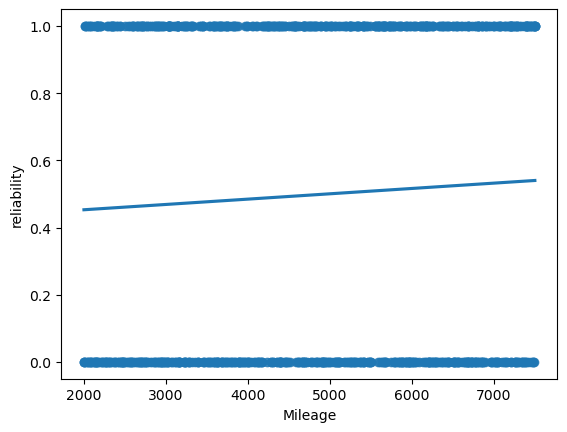

In [27]:
sns.regplot(x = X_train['Mileage'] , y=y_train , logistic=True,ci = None)

In [28]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 500)  
 
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
 

print("ACCURACY OF THE MODEL:", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL: 0.55
